# [Logistic regression] 
## Titanic Data Import and required packages

In [1]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
sns.set(style = "white") # while background
sns.set(style = "whitegrid", color_codes = True)

import warnings
warnings.simplefilter(action='ignore')


In [2]:
train_df = pd.read_csv('/Users/catherine/Desktop/Titanic Data/train.csv')

In [3]:
test_df = pd.read_csv('/Users/catherine/Desktop/Titanic Data/titanic_test.csv')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
print('The number of samples into the train data is {}.'.format(train_df.shape[0]))

The number of samples into the train data is 891.


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
print('The number of sample into the test data is {}.'.format(test_df.shape[0]))

The number of sample into the test data is 459.


## Data quality & Missing value Assessment

In [9]:
train_df.shape # 데이터 구조

(891, 12)

In [10]:
train_df.shape[0] #행

891

In [11]:
train_df.shape[1] #열

12

In [12]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### 177 row doesn't have age information => should understand why

In [13]:
a= train_df['Age'].isnull().sum()

In [14]:
b= train_df['Age'].sum() # 총 나이의 합: 갯수가 아님, 행/열 세기: https://rfriend.tistory.com/450

In [15]:
train_df['Age'].shape[0]

891

In [16]:
# Percent of missing age
print('Percent of missing "age" records is %.2f%%' %((train_df['Age'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "age" records is 19.87%


##### ~20% of entires of passengers are missing => Too big portion 

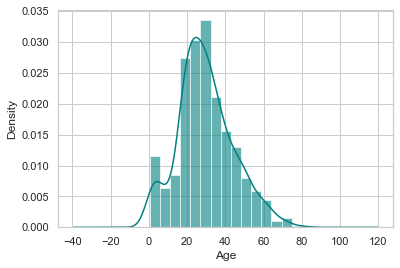

In [17]:
ax = train_df["Age"].hist(bins =15, density =True, stacked = True, color = "teal", alpha = 0.6)
train_df["Age"].plot(kind='density', color = 'teal')
ax.set(xlabel ="Age")
plt.xlim()
plt.show()

##### Age distribution shows right skewed. Using the mean might give us biased results by filling in ages that are older 

## cabin - missing values

In [18]:
print('Percent of missing "Cabin" record is %.2f%%'%(train_df['Cabin'].isnull().sum()/train_df.shape[0]*100))

Percent of missing "Cabin" record is 77.10%


77% of records are missing, which means that imputing information and using this variable for prediction is probably not wise. We'll ignore this variable in our model.

## Embarked- Missing Values

In [19]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
print('Percent of missing "Embarled" records is %.2f%%' %(train_df['Embarked'].isnull().sum()/train_df.shape[0]*100))

Percent of missing "Embarled" records is 0.22%


There are only 2 (0.22%) missing values for "Embarked", so we can impute with the port where most people boarded. 

Boarded passengers grouped by port of embarkation (C = Cherboug, Q= Queenstown, S= Southampton): 
S    644
C    168
Q     77
Name: Embarked, dtype: int64


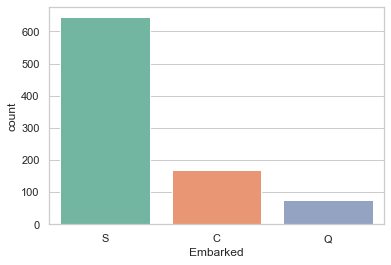

In [21]:
print('Boarded passengers grouped by port of embarkation (C = Cherboug, Q= Queenstown, S= Southampton): ')
print(train_df['Embarked'].value_counts())
sns.countplot(x='Embarked', data= train_df, palette = 'Set2')
plt.show()

In [22]:
train_df['Embarked'].value_counts().idxmax()

'S'

## Final Adjustments to Data (Train & Test)

Based on my assessent of the missing values in the data set, I'll make the following changes to the data:
* if "Age" is missing for a given row, I'll imput with 28 (median age)
* If "Embarked" is missing for a riven row, I'll imput with "S" (the most common boarding port).
* I'll ignore "Cabin" as a variable. There are too many missing values.
* "Cabin" seems to appear to be associated with the passenger's class and fare.

In [23]:
train_data = train_df.copy()
train_data['Age'].fillna(train_df["Age"].median(skipna=True), inplace=True) # 미디안 값을 넣어라

train_data['Embarked'].fillna(train_df["Embarked"].value_counts().idxmax(), inplace = True)
# Series.idxmax: Return index of the maximum element.

train_data.drop('Cabin', axis=1, inplace= True) # cabin 칼럼을 없애라

In [24]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
train_data.head() # 다시 데이터 보기

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<function matplotlib.pyplot.show(close=None, block=None)>

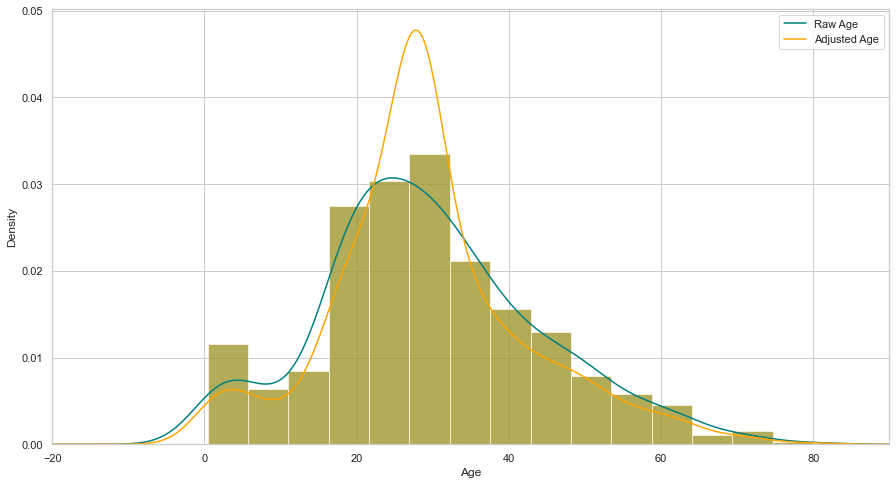

In [26]:
plt.figure(figsize = (15, 8))
ax= train_df["Age"].hist(bins=15, density=True, stacked=True, color = 'teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax= train_df["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-20, 90)
plt.show

### Additional Variables

Both SibSp and Parch are related to the trip with family. For simplicity, I'll combine the effect of these variables into one categorical predictor.

In [27]:
## create categorical variable for traveling alone

train_data['TravelAlone']=np.where((train_data['SibSp']+train_data['Parch'])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace =True)
train_data.drop('Parch', axis=1, inplace=True)

[Numpy where function multiple conditions]

Syntax :numpy.where(condition[, x, y])
Parameters:
condition : When True, yield x, otherwise yield y.
x, y : Values from which to choose. x, y and condition need to be broadcastable to some shape.

Returns:
out : [ndarray or tuple of ndarrays] If both x and y are specified, the output array contains elements of x where condition is True, and elements from y elsewhere.

If only condition is given, return the tuple condition.nonzero(), the indices where condition is True.


In [28]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


[Data Dictionary]
https://www.kaggle.com/c/titanic/data

* sibsp:	# of siblings / spouses aboard the Titanic	
* parch:	# of parents / children aboard the Titanic

__Creating & Converting categorical variables for Passenger Class(PClass), Sex, and port embarked.__

In [29]:
# create categorical variables and drop some variables
training = pd.get_dummies(train_data, columns =["Pclass","Embarked", "Sex"])
training.drop('Sex_female', axis =1, inplace=True)
training.drop('PassengerId', axis=1, inplace =True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace = True)

final_train = training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


__pandas.get_dummies()__

is used for data manipulation. It converts categorical data into dummy or indicator variables.

======
import pandas as pd
 
con = pd.Series(list('abcba'))
print(pd.get_dummies(con))


Output:   
 a b c  
 1 0 0
 
 0 1 0 
 
 0 0 1
 
 0 1 0
 
 1 0 0 

__Apply the same changes to the test data__

Appling the same methodology that I applied to the training data set to test data set.

In [30]:
test_df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age              89
sibsp             0
parch             0
ticket            0
fare              0
cabin           355
embarked          1
boat            281
body            411
home.dest       178
dtype: int64

In [31]:
test_df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,295,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,17421,110.8833,C70,C,B,NaN,"Haverford, PA"
1,1150,3,"Risien, Mr. Samuel Beard",male,NaN,0,0,364498,14.5000,NaN,S,NaN,NaN,NaN
2,89,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,NaN,NaN,"Montreal, PQ"
3,1063,3,"Nirva, Mr. Iisakki Antino Aijo",male,41.0,0,0,SOTON/O2 3101272,7.1250,NaN,S,NaN,NaN,"Finland Sudbury, ON"
4,1020,3,"Minkoff, Mr. Lazar",male,21.0,0,0,349211,7.8958,NaN,S,NaN,NaN,NaN


In [32]:
test_df.columns

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [48]:
test_data = test_df.copy()

In [49]:
test_data["age"].fillna(test_df["age"].median(skipna=True), inplace=True)

In [50]:
test_data["cabin"]

0      C70
1      NaN
2      B71
3      NaN
4      NaN
      ... 
454    NaN
455    NaN
456    NaN
457    NaN
458    NaN
Name: cabin, Length: 459, dtype: object

In [51]:
test_data["age"].fillna(test_df["age"].median(skipna=True), inplace=True)
test_data.drop("cabin", axis=1, inplace=True)
test_data['travelAlone']=np.where((test_data["sibsp"] + test_data["parch"])>0, 0, 1)

test_data.drop('sibsp', axis=1, inplace=True)
test_data.drop('parch', axis=1, inplace=True)

testing=pd.get_dummies(test_data, columns = ['pclass', 'embarked', 'sex'])

In [52]:
testing.drop('sex_female', axis =1, inplace=True)
testing.drop('passenger_id',axis =1, inplace=True)
testing.drop('name', axis=1, inplace=True)
testing.drop('ticket', axis=1, inplace=True)

final_test=testing
final_test.head()

,age,fare,boat,body,home.dest,travelAlone,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,embarked_S,sex_male
0,17.0,110.8833,B,NaN,"Haverford, PA",0,1,0,0,1,0,0,1
1,29.0,14.5000,NaN,NaN,NaN,1,0,0,1,0,0,1,1
2,31.0,52.0000,NaN,NaN,"Montreal, PQ",0,1,0,0,0,0,1,1
3,41.0,7.1250,NaN,NaN,"Finland Sudbury, ON",1,0,0,1,0,0,1,1
4,21.0,7.8958,NaN,NaN,NaN,1,0,0,1,0,0,1,1


## Exploratory Data Analysis

### Exploration of Age

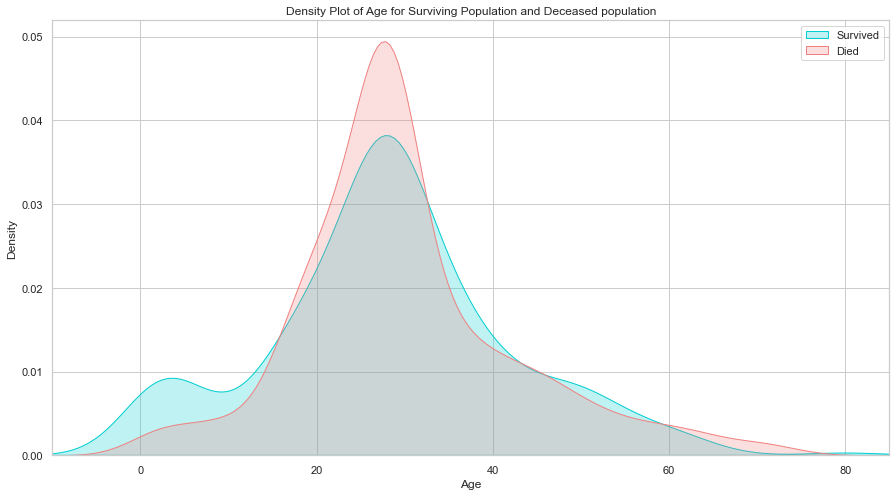

In [57]:
plt.figure(figsize= (15, 8))
ax = sns.kdeplot(final_train["Age"][final_train.Survived ==1], color ='darkturquoise', shade= True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], color='lightcoral', shade = True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased population')
ax.set(xlabel='Age')
plt.xlim(-10, 85)
plt.show()

In [63]:
a= final_train["Age"][final_train.Survived ==1].count() # Survived No.
a

342

In [64]:
b= final_train["Age"][final_train.Survived == 0].count() #died No.
b

549

In [65]:
final_train["Age"][final_train.Survived ==1]

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

The age distribution for survivors and deceased is actually very simillar. One notable diffrence is that, of the survivors, __a larger proportion were children.__ The passeners evidently made an attept to save children by giving them a palce on the life rafts.

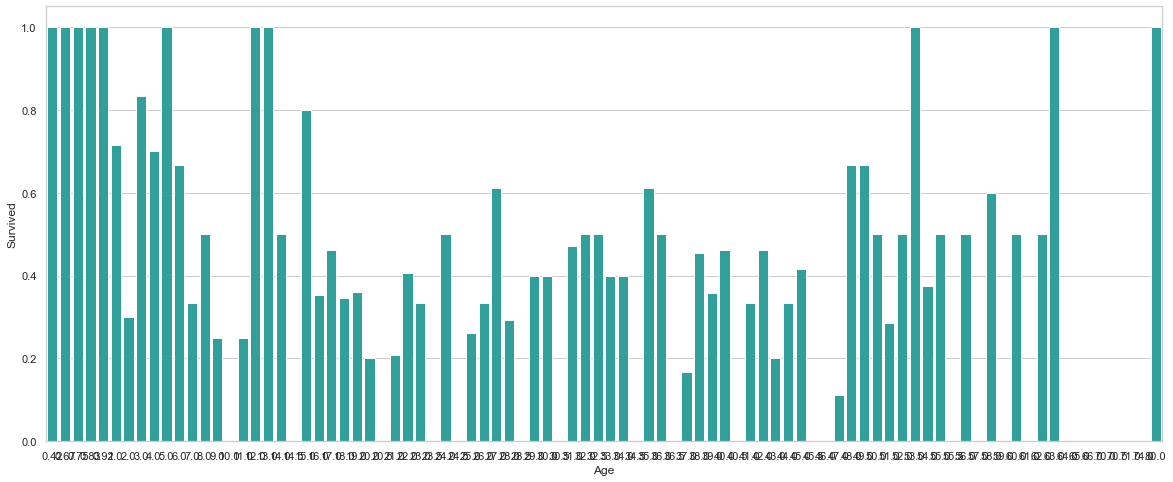

In [74]:
plt.figure(figsize=(20, 8))
avg_surival_byage = final_train[["Age" ,"Survived"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_surival_byage, color = "lightSeaGreen")

Considerng the survival rate of pasengers under 16, I'll also __include another categorical variale in my dataset:"Minor"__

In [76]:
final_train['IsMinor']= np.where(final_train['Age']<=16, 1, 0) 
# multi conditions and put one hot incording

In [78]:
final_test['isMinor']=np.where(final_test['age']<=16, 1, 0)

### Exploration of Fare

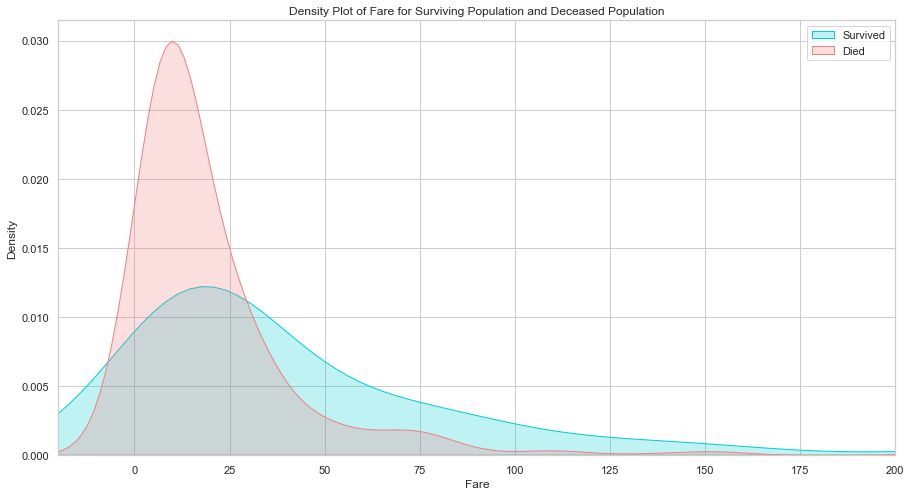

In [80]:
plt.figure(figsize=(15, 8))
ax = sns.kdeplot(final_train['Fare'][final_train.Survived ==1], color= 'darkturquoise', shade= True)
sns.kdeplot(final_train['Fare'][final_train.Survived ==0], color = "lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20, 200)
plt.show()

__People who paid the fare less than $25 appear to have been less likely to survive.__

### Exploration of Passenger Class

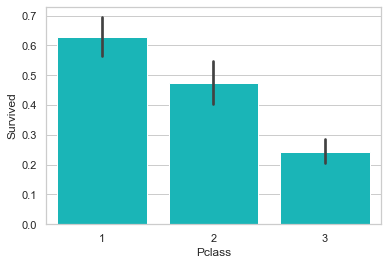

In [82]:
sns.barplot('Pclass', 'Survived', data= train_df, color ='darkturquoise')
plt.show()

__As expected, the lower class goes, the more people could survive.__

### Exloration of Embark Port

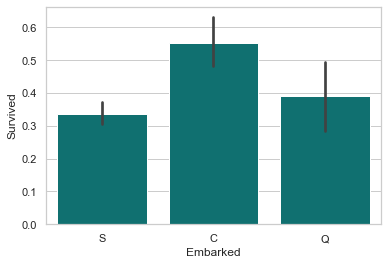

In [84]:
sns.barplot('Embarked', 'Survived', data=train_df, color ='teal')
plt.show()

__Passengers who boarded in Cherbourg, France showed the higehest survival rate.__ 

__Whiskers indicated??__

It's also worth noting the size of the whiskers in these plots. Because the number of passengers who boarded at Southhampton was highest, the confidence around the survival rate is the highest. The whisker of the Queenstown plot includes the Southhampton average, as well as the lower bound of its whisker. It's possible that Queenstown passengers were equally, or even more, ill-fated than their Southhampton counterparts.

### Exloratory of Traveling Alone vs. With Family

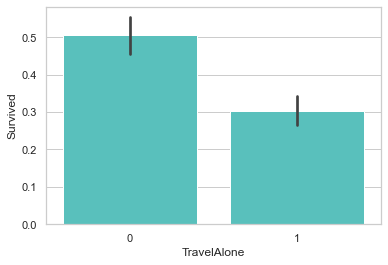

In [85]:
sns.barplot('TravelAlone', 'Survived', data=final_train, color = "mediumturquoise")
plt.show()

Individuals traveling without family were more likely to die in the diseaster than those with famil aboard. Given the era, it's likelly that individuals traveling alone were likely male. 

### Exploration of Gender Variable

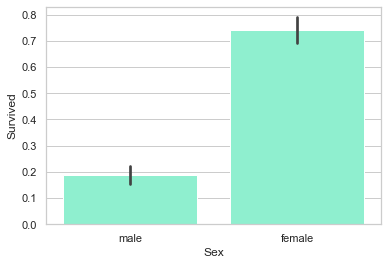

In [87]:
sns.barplot('Sex', 'Survived', data= train_df, color='aquamarine')
plt.show()

Clearly, females survivied much more than males. 

# Titanic's Logistic Regression and Results 

## Feature selection

### Recursive feature elimination

Given an external estimator that assigns weights to features, __recursive feature elimination(RFE) is to select features by recursively considering smaller and smalelr sets of features.__

* First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a __coef_attribute__ or through __feature_importances___ attribute. 
* Then the least important featuers are pruned from the current set of features. 
* that procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached. 


References: <br>
http://scikit-learn.org/stable/modules/feature_selection.html <br>

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols=['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C' ,'Embarked_S', 'Sex_male' ,'IsMinor']
X= final_train[cols]
y= final_train['Survived']

# Build a logreg and compute the feature importances
model = LogisticRegression()

# Create the RFE model and select 8 attributes
rfe= RFE(model, 8)
rfe= rfe.fit(X, y)


# Summarize the selection of the attributes
print('Selected feature: %s' %list(X.columns[rfe.support_]))

Selected feature: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


### Feature ranking with recursive feature elimination and cross-validation

__RFECV performs RFE in a cross-Validation loop to find the optimal nubmer or the best number of features__. Hereafter a recursive feature elimination applied on ogistic regerssion with automatic tuning of the number of faetures selected with cross-validation.

In [93]:
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cros-validated score.
# the "Accuracy" scoring is proportional to the number of correct classifications

rfecv = RFECV(estimator = LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y) 

RFECV(cv=10, estimator=LogisticRegression(), scoring='accuracy')

In [94]:
print("Optimal number of features: %d" %rfecv.n_features_)
print("Selected features: %s" %list(X.columns[rfecv.support_]))

Optimal number of features: 9
Selected features: ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


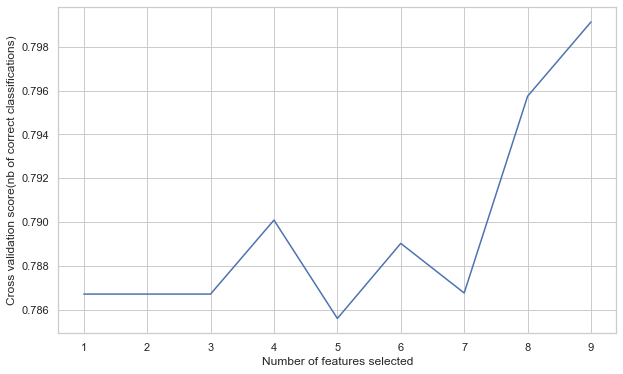

In [95]:
# Plot number of features Vs. cross-validation scores

plt.figure(figsize =(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score(nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) +1), rfecv.grid_scores_)
plt.show()

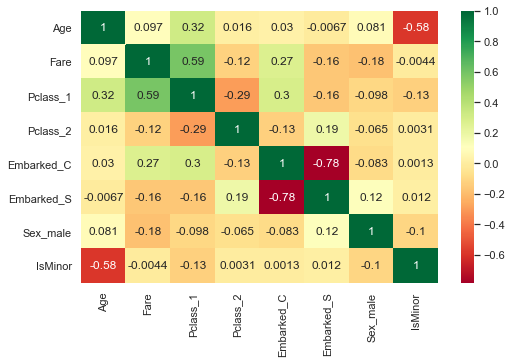

In [97]:
Selected_features =['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']
X = final_train[Selected_features]

plt.subplots(figsize=(8,5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

### Revew of model evaluation procedures

__Motivation: Need a way to choose between ML models__
* Goal: to estimate the most likely performance of a model on out-of-sample data

__Initial idea: Train and test on the same data__
* however, maximizing training accuracy rewards overy complex models which overfit the training data


__Alternative idea: Train/Test split__
* Split the dataset into two pieces, so that the model cna be trained and tested on different data
* Testing accurac yis a better estimate than traning accuracy of out-of-sample performance
* Prolem with train/Test split
   * It provides a high variance estimate since changing hwich observations happen to be in the testign set can signifiantly change testing accuracy
   * Testing accuracy can change a lot depending on a which observation happen to be in the testing set
   
Reference: <br>
http://www.ritchieng.com/machine-learning-cross-validation/ <br>


### Model evaluation based on simple train/test split using __train_test_split() function

In [100]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

In [102]:
# Create X(featuers) and y(response)
X = final_train[Selected_features]
y = final_train['Survived']

In [106]:
# Use Train/Test split with different random_staet values
# We can chagne the Random_state Values that changes the accuracy Scores
#the Scores change a lot, this is why testig scoresi s a high-variance estimate

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [107]:
# Check classification scores of logistic regression
logreg= LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba=logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr]= roc_curve(y_test, y_pred_proba)

In [112]:
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))


Train/Test split results:
LogisticRegression accuracy is 0.777
LogisticRegression log_loss is 0.506
LogisticRegression auc is 0.838


In [113]:
# index of the first threshold for which the accuracy >0.95
idx = np.min(np.where(tpr>0.95))

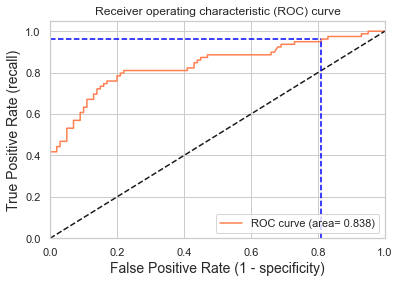

In [116]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area= %0.3f)' %auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')

plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

